(finite-difference-method-section)=
# The finite-difference method

The finite-difference method for solving a boundary value problem replaces the derivatives in the ODE with <a href="https://en.wikipedia.org/wiki/Finite_difference" target="_blank">finite-difference approximations</a> derived from the Taylor series. This results in linear system of algebraic equations that can be solved to give an approximation of the solution to the BVP.

The derivatives of $y_i$ are approximated using values of neighbouring nodes $y_{i+1}$, $y_{i-1}$ etc. using expressions derived by truncating the Taylor series and rearranging to make the derivative term the subject. Some common finite-difference approximations are tabulated below.

| Finite-difference approximation | Error | Name
|:--:|:--:|:--:|
| $y' = \dfrac{y_{i+1} - y_i}{h}$ | $O(h)$ | Forward difference |
| $y' = \dfrac{y_i - y_{i-1}}{h}$ | $O(h)$ | Backward difference |
| $y' = \dfrac{y_{i+1} - y_{i-1}}{2h}$ | $O(h^2)$ | Central difference |
| $y'' = \dfrac{y_{i-1} - 2 y_i + y_{i+1}}{h^2}$ | $O(h^2)$ | Symmetric difference |

The solution to a boundary value problem using then finite-difference method is determined by approximating the derivatives in the ODE using finite-differences. Consider the following boundary value problem

$$ \begin{align*}
    y'' = f(t,y), \qquad t \in [t_0, t_{\max}], \qquad y(t_0) = a, \qquad y(t_{\max}) = b. 
\end{align*} $$

Using the symmetric difference to approximate $y''$ in the ODE we have

$$ \begin{align*}
    \frac{y_{i-1} - 2y_i + y_{i+1}}{h^2} &= f(t_i ,y_i) \\
    y_{i-1} - 2y_i + y_{i+1} &= h^2f(t_i, y_i).
\end{align*} $$

Since we know that $y_0 = a$ and $y_n = b$ then 

$$ \begin{align*}
    y_0 &= a, \\
    y_0 - 2y_1 + y_2 &= h^2 f(t_1, y_1), \\
    y_1 - 2y_2 + y_3 &= h^2 f(t_2, y_2), \\
    & \vdots \\
    y_{n-3} - 2y_{n-2} + y_{n-1} &= h^2 f(t_{n-2}, y_{n-2}), \\
    y_{n-2} - 2y_{n-1} + y_{n} &= h^2 f(t_{n-1}, y_{n-1}), \\
    y_{n} &= b,
\end{align*} $$

which can be written as the matrix equation

$$ \begin{align*}
    \begin{pmatrix}
        1 & 0  \\
        1 & -2 & 1  \\
        & 1 & -2 & 1 \\
        & & \ddots & \ddots & \ddots \\
        & & & 1 & -2 & 1 \\
        & & & & 1 & -2 & 1 \\
        & & & & & 0 & 1
    \end{pmatrix}
    \begin{pmatrix} y_0 \\ y_1 \\ y_2 \\ \vdots \\ y_{n-2} \\ y_{n-1} \\ y_n \end{pmatrix} =
    \begin{pmatrix} a \\ f(t_1, y_1) \\ f(t_2, y_2) \\ \vdots \\ f(t_{n-2}, y_{n-2} \\ f(t_{n-1}, y_{n-1}) \\ b \end{pmatrix}.
\end{align*} $$

<!-- ---

(thomas-algorithm-section)=

## The Thomas algorithm

The coefficient matrix for the linear system that results from the application of the second-order symmetric finite-difference approximation of $y''$ is <a href="https://en.wikipedia.org/wiki/Tridiagonal_matrix" target="_blank">tri-diagonal matrix</a> (the only non-zero elements are on the main, lower and upper diagonals). The usual methods for solving linear systems of equations such as <a href="https://jonshiach.github.io/LA-book/_pages/2.3_Gaussian_elimination.html" target="_blank">Gaussian elimination</a> and [LU decomposition](solving-systems-using-lu-section) could be applied here, however there is a more efficient method that can solve tri-diagonal systems called the <a href="https://en.wikipedia.org/wiki/Tridiagonal_matrix_algorithm" target="_blank">Thomas algorithm</a>). 

````{prf:definition} The Thomas algorithm
:class: note
:label: thomas-method-definition

Given a tri-diagonal linear system of equations of the form $A \mathbf{x} = \mathbf{b}$

$$ \begin{align*}
    \begin{pmatrix} 
        b_0 & c_0 \\
        a_1 & b_1 & c_1 \\
        & \ddots & \ddots & \ddots \\
        & & a_{n-1} & b_{n-1} & c_{n-1} \\
        & & & a_n & b_n
    \end{pmatrix}
    \begin{pmatrix} x_0 \\ x_1 \\ \vdots \\ x_{n-1} \\ x_n \end{pmatrix} =
    \begin{pmatrix} d_0 \\ d_1 \\ \vdots \\ d_{n-1} \\ d_n \end{pmatrix},
\end{align*} $$

the solution can be found by performing a forward sweep on the $b_i$ and $d_i$ coefficients

$$ \begin{align*}
    b_i &= b_i - c_{i-1} \left( \frac{a_i}{b_{i-1}} \right), & i = 1, 2, \ldots, n, \\
    d_i &= d_i - d_{i-1} \left( \frac{a_i}{b_{i-1}} \right), & i = 1, 2, \ldots, n, 
\end{align*} $$

and then calculate the values of $x_i$ using back substitution

$$ \begin{align*}
    x_n &= \frac{d_n}{b_n}, \\
    x_i &= \frac{d_i - c_i x_{i+1}}{b_i}, \qquad i = n-1, n-2, \ldots, 1.
\end{align*} $$
````

### Code

```python
def tridiagonal_solver(A, b):

    n = len(b)
    for i in range(1, n):
        A[i,i] -= A[i-1,i] * A[i,i-1] / A[i-1,i-1]
        b[i] -= b[i-1] * A[i,i-1] / A[i-1,i-1]
    
    x = np.zeros(n)
    x[-1] = b[-1] / A[-1,-1]
    for i in range(n-2, -1, -1):
        x[i] = (b[i] - A[i,i+1] * x[i+1]) / A[i,i]

    return x
``` -->

```{prf:example}
:class: seealso
:label: bvp-finite-difference-example

Use the finite-difference method to solve the boundary below using a step length of $h = 0.2$

$$ \begin{align*}
    y'' - y' - y = 0, \qquad y(0) = 0, \qquad y(1) = 2.
\end{align*} $$

---

**Solution**

Using a forward difference to approximate $y'$ and a symmetric difference to approximate $y''$ we have

$$ \begin{align*}
    \frac{y_{i-1} -2y_i +y_{i+1} }{h^2 }-\frac{y_{i+1} -y_i }{h}-y_i = 0,
\end{align*} $$

which can be simplified to

$$ \begin{align*}
    y_{i-1} +(h-h^2 -2)y_i +(1-h)y_{i+1} = 0.
\end{align*} $$

This gives the following system of linear equations

$$ \begin{align*}
    y_0 &= 0, \\
    y_0 + (h - h^2 - 2) y_1 + (1 - h) y_2 &= 0, \\
    y_1 + (h - h^2 - 2) y_2 + (1 - h) y_3 &= 0, \\
    &\vdots \\
    y_{n-3} + (h - h^2 - 2) y_{n-2} + (1 - h) y_n &= 0, \\
    y_{n-2} + (h - h^2 - 2) y_{n-1} + (1 - h) y_n &= 0, \\
    y_n &= 2.
\end{align*} $$

which we can write the linear system as the matrix equation

$$ \begin{align*}
    \begin{pmatrix}
        1 & 0 & &  &  & \\
        1 & h-h^2 -2 & 1-h &  &  & \\
        &  \ddots  & \ddots  & \ddots  & \\
        &  & 1 & h-h^2 -2 & 1-h \\
        &  &  & 0 & 1
    \end{pmatrix} 
    \begin{pmatrix} y_0 \\ y_1 \\ \vdots \\ y_{n-1} \\ y_n \end{pmatrix}  =
    \begin{pmatrix} 0 \\ 0 \\ \vdots \\ 0 \\ 2  \end{pmatrix}.
\end{align*} $$

If we use a step length of $h=0.2$ we have

$$ \begin{align*}
    \vec{t} = (0, 0.2, 0.4, 0.6, 0.8, 1),
\end{align*} $$

and

$$ \begin{align*}
    \begin{pmatrix}
        1 & 0 \\
        1 & -1.84 & 0.8 \\
        & 1 & -1.84 & 0.8 \\
        & & 1 & -1.84 & 0.8 \\
        & & & 1 & -1.84 & 0.8 \\
        & & & & 0 & 1
    \end{pmatrix}
    \begin{pmatrix} y_0 \\ y_1 \\ y_2 \\ y_3 \\ y_4 \\ y_5 \end{pmatrix} = 
    \begin{pmatrix} 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 2 \end{pmatrix}.
\end{align*} $$

Solving this system of linear equations gives

$$ \mathbf{y} = (0, 0.2060, 0.4738, 0.8322, 1.3219, 2). $$
```

---

## Code

The code below calculates the solution to the boundary value problem in  {prf:ref}`bvp-finite-difference-example`.

`````{tab-set}
````{tab-item} Python
```python
import numpy as np
import matplotlib.pyplot as plt

# Define BVP parameters
tspan = [0, 1]          # boundaries of the t domain
bvals = [0, 2]          # boundary values
h = 0.2                 # step length

# Define linear system
n = int((tspan[1] - tspan[0]) / h) + 1
t = np.arange(n) * h    # t array
A = np.eye(n)
b = np.zeros(n)
b[0], b[-1] = bvals[0], bvals[1]
for i in range(1, n-1):
    A[i,i-1] = 1
    A[i,i] = h - h ** 2 - 2
    A[i,i+1] = 1 - h
        
# Solve linear system
y = np.linalg.solve(A, b)
```
````

````{tab-item} MATLAB
```matlab
% Define BVP parameters
tspan = [0, 1];
bvals = [0, 2];
h = 0.2;

% Define linear system
n = floor((tspan(2) - tspan(1)) / h) + 1;
t = (tspan(1) : h : tspan(2));
A = eye(n);
b = zeros(n, 1);
b(1) = bvals(1);
b(n) = bvals(2);
for i = 2 : n - 1
    A(i, i-1) = 1;
    A(i, i) = h - h ^ 2 - 2;
    A(i, i+1) = 1 - h;
end

% Solve linear system
y = A \ b;
```
````
`````

|  t  |    y     |  Exact   |  Error   |
|:---:|:--------:|:--------:|:--------:|
| 0.0 | 0.000000 | 0.000000 | 0.00e+00 |
| 0.2 | 0.205992 | 0.221296 | 1.53e-02 |
| 0.4 | 0.473782 | 0.501419 | 2.76e-02 |
| 0.6 | 0.832209 | 0.865840 | 3.36e-02 |
| 0.8 | 1.321853 | 1.349412 | 2.76e-02 |
| 1.0 | 2.000000 | 2.000000 | 0.00e+00 |


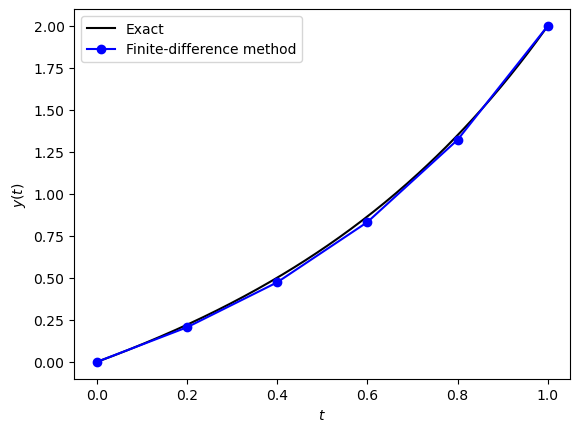

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Define exact solution
def exact(t):
    return (2 * np.exp((1 - np.sqrt(5)) * (t - 1) / 2) * (np.exp(np.sqrt(5) * t) -1)) / (np.exp(np.sqrt(5)) - 1)
 

# Define BVP parameters
tspan = [0, 1]          # boundaries of the t domain
bvals = [0, 2]          # boundary values
h = 0.2                 # step length

# Define linear system
n = int((tspan[1] - tspan[0]) / h) + 1
t = np.arange(n) * h    # t array
A = np.eye(n)
b = np.zeros(n)
b[0], b[-1] = bvals[0], bvals[1]
for i in range(1, n-1):
    A[i,i-1] = 1
    A[i,i] = h - h ** 2 - 2
    A[i,i+1] = 1 - h
        
# Solve linear system
y = np.linalg.solve(A, b)

# Print table of solution values
print("|  t  |    y     |  Exact   |  Error   |")
print("|:---:|:--------:|:--------:|:--------:|")
for n in range(len(t)):
    print(f"| {t[n]:0.1f} | {y[n]:6.6f} | {exact(t[n]):6.6f} | {abs(exact(t[n]) - y[n]):6.2e} |")
    
# Plot solution
t_exact = np.linspace(0, tspan[1], 200)
y_exact = exact(t_exact)
fig, ax = plt.subplots()
plt.plot(t_exact, y_exact, "k-", label="Exact")
plt.plot(t, y, "bo-", label=f"Finite-difference method")
plt.xlabel("$t$")
plt.ylabel("$y(t)$")
plt.legend()
plt.show()

from myst_nb import glue
glue("bvp_fd_plot", fig, display=False)

## Order vs number of nodes

The solutions seen in {prf:ref}`bvp-finite-difference-example` seem to show that the finite-difference method produces reasonably accurate results for this boundary value problem. One way to improve on the accuracy of our solution is to increase the number of nodes used.

Consider the solution of the following BVP using the finite-difference method

$$ y'' + 3ty' + 7y = \cos (2t), \qquad y(0) = 1, \qquad y(3) = 0. $$

Using forward and symmetric differences to approximate $y'$ and $y''$ respectively gives

$$ \begin{align*}
    \frac{y_{i-1} - 2y_i + y_{i+1}}{h^2} + 3t_i \left( \frac{y_{i+1} - y_i}{h}\right) + 7y_i &= \cos(2t_i) \\
    y_{i-1} + (7h^2 - 3ht_i - 2)y_i + (1 + 3ht_i)y_{i+1} &= h^2 \cos(2t_i).
\end{align*} $$

So the linear system is

$$ \begin{align*}
    \begin{pmatrix} 
        1 & 0 \\
        1 & 7h^2 - 3ht_1 - 2 & 1 + 3ht_1 \\
        & \ddots & \ddots & \ddots \\
        && 1 & 7h^2 - 3ht_{N-1} - 2 & 1 + 3ht_{N-1} \\
        &&& 0 & 1
    \end{pmatrix}
    \begin{pmatrix} y_0 \\ y_1 \\ \vdots \\ y_{N-1} \\ y_N \end{pmatrix} \\
    = \begin{pmatrix} 1 \\ h^2 \cos(2t_1) \\ \vdots \\ h^2 \cos(2t_{N-1}) \\ 0 \end{pmatrix}.
\end{align*} $$

The solution of this BVP is shown in {numref}`bvp-fd-accuracy-figure-1` for $h=0.05$ and $h = 0.005$. Since we used a first-order approximation for $y'$ the error for this method is $O(h)$ and we expect the solution using $h=0.005$ to be more accurate. 

```{glue:figure} bvp_fd_accuracy_plot_1
:name: bvp-fd-accuracy-figure-1
:figwidth: 600

Solutions to the boundary value problem $y'' + 3ty' + 7y = \cos (2t)$, $t \in [0,3]$, $y(0) = 1$, $y(3) = 0$ using first-order finite-difference approximations with $h=0.05$ and $h=0.005$.
```

To obtain a more accurate solution, instead of increasing the number of nodes we could use the [central difference approximation](finite-difference-method-section) (which is second-order accurate) to approximate $y'$

$$ \begin{align*}
    \frac{y_{i-1} - 2y_i + y_{i+1}}{h^2} + 3t_i\left( \frac{y_{i+1} - y_{i-1}}{2h} \right) + 7y_i &= \cos(2t_i) \\
    (2 - 3ht_i)y_{i-1} + (14h^2 - 4)y_i + (2 + 3ht_i)y_{i+1} &= 2h^2 \cos(2t_i).
\end{align*} $$

So the linear system for the second-order finite-difference method is

$$ \begin{align*}
    \begin{pmatrix} 
        1 & 0 \\
        2 - 3ht_1 & 14h^2 - 4 & 2 + 3ht_1 \\
        & \ddots & \ddots & \ddots \\
        && 2 - 3ht_{N-1} & 14h^2 - 4 & 2 + 3ht_{N-1} \\
        &&& 0 & 1
    \end{pmatrix}
    \begin{pmatrix} y_0 \\ y_1 \\ \vdots \\ y_{N-1} \\ y_N \end{pmatrix} \\
    = \begin{pmatrix} 1 \\ 2h^2 \cos(2t_1) \\ \vdots \\ 2h^2 \cos(2t_{N-1}) \\ 0 \end{pmatrix}.
\end{align*} $$

The solution using the second-order finite difference method with $h=0.05$ has been plotted against the first-order solution using $h=0.05$ and $h=0.005$ in {numref}`bvp-fd-accuracy-figure-2`. The second order solution gives good agreement with the first order solution using 10 times fewer nodes.

```{glue:figure} bvp_fd_accuracy_plot_2
:name: bvp-fd-accuracy-figure-2
:figwidth: 600

Solutions to the boundary value problem $y'' + 3ty' + 7y = \cos (2t)$, $t \in [0,3]$, $y(0) = 1$, $y(3) = 0$ using first-order and second-order finite-difference approximations with $h=0.05$ and $h=0.005$.
```

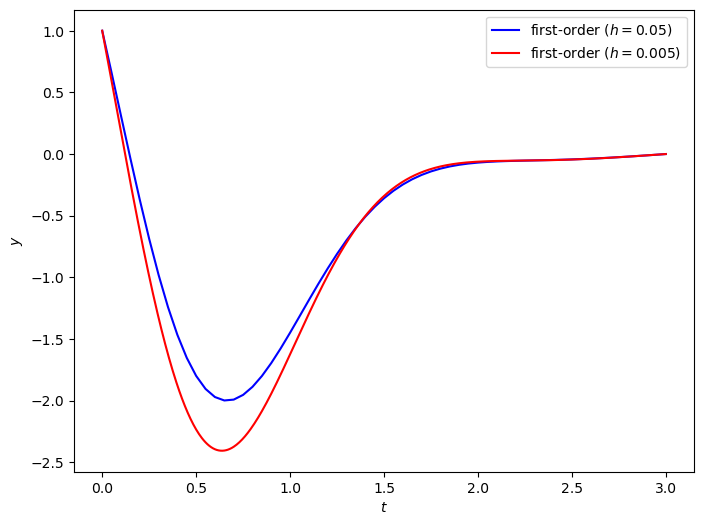

In [25]:
# Define BVP parameters
tspan = [0, 3]         # boundaries of the t domain
bvals = [1, 0]         # boundary values
hvals = [0.05, 0.005]  # step lengths

tsol, ysol = [], []
for h in hvals:
    # Define linear system (first-order)
    n = int((tspan[1] - tspan[0]) / h) + 1
    t = np.arange(n) * h    # t array
    A = np.eye(n)
    b = np.zeros(n)
    b[0], b[-1] = bvals[0], bvals[1]
    for i in range(1, n-1):
        A[i,i-1] = 1
        A[i,i] = 7 * h ** 2 - 3 * h * t[i] - 2
        A[i,i+1] = 1 + 3 * h * t[i]
        b[i] = h ** 2 * np.cos(2 * t[i])

    # Solve linear system
    y = np.linalg.solve(A, b)
    ysol.append(y)
    tsol.append(t)

# Define linear system (second-order)
h = hvals[0]
n = int((tspan[1] - tspan[0]) / h) + 1
t = np.arange(n) * h
A = np.eye(n)
b = np.zeros(n)
b[0], b[-1] = bvals[0], bvals[1]
for i in range(1, n-1):
    A[i,i-1] = 2 - 3 * h * t[i]
    A[i,i] = 14 * h ** 2 - 4
    A[i,i+1] = 2 + 3 * h * t[i]
    b[i] = 2 * h ** 2 * np.cos(2 * t[i])

# Solve linear system
y = np.linalg.solve(A, b)
ysol.append(y)
tsol.append(t)

# Plot solution (first-order only)
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(tsol[0], ysol[0], "b-", label=f"first-order ($h={hvals[0]})$")
plt.plot(tsol[1], ysol[1], "r-", label=f"first-order ($h={hvals[1]})$")
plt.xlabel("$t$")
plt.ylabel("$y$")
plt.legend()
plt.show()

from myst_nb import glue
glue("bvp_fd_accuracy_plot_1", fig, display=False)

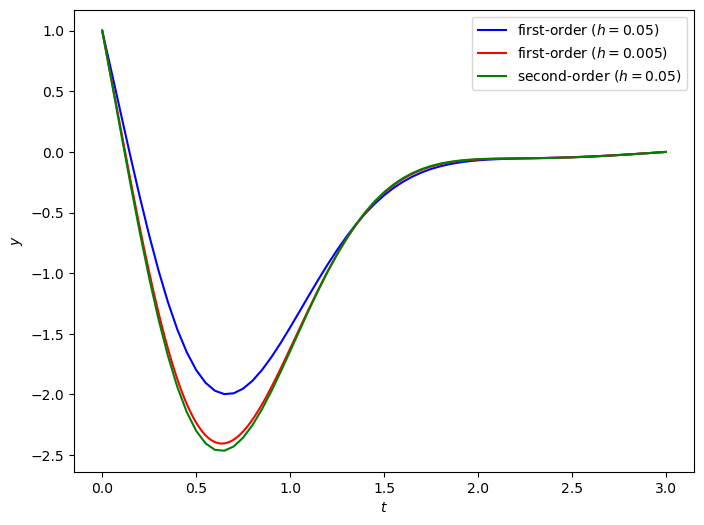

In [26]:
# Plot solution (first and second-order)
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(tsol[0], ysol[0], "b-", label=f"first-order ($h={hvals[0]}$)")
plt.plot(tsol[1], ysol[1], "r-", label=f"first-order ($h={hvals[1]}$)")
plt.plot(tsol[2], ysol[2], "g-", label=f"second-order ($h={h}$)")
plt.xlabel("$t$")
plt.ylabel("$y$")
plt.legend()
plt.show()

from myst_nb import glue
glue("bvp_fd_accuracy_plot_2", fig, display=False)